In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]

In [39]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


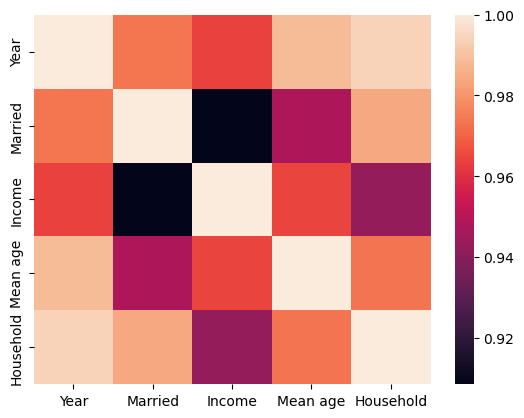

In [40]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [41]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

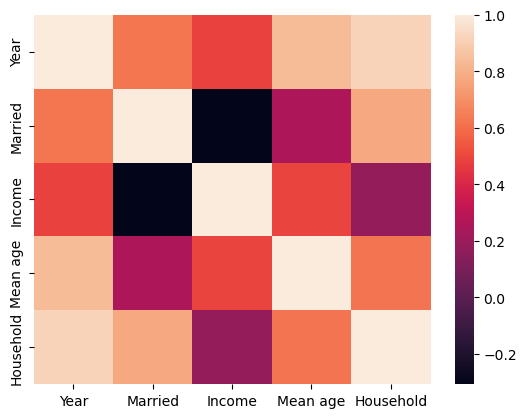

In [42]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [43]:
new

,Year,Married,Income,Mean age,Household
Year,1.000000,0.973903,0.964185,0.988373,0.993961
Married,0.973903,1.000000,0.908483,0.947680,0.984306
Income,0.964185,0.908483,1.000000,0.964535,0.942613
Mean age,0.988373,0.947680,0.964535,1.000000,0.973480
Household,0.993961,0.984306,0.942613,0.973480,1.000000


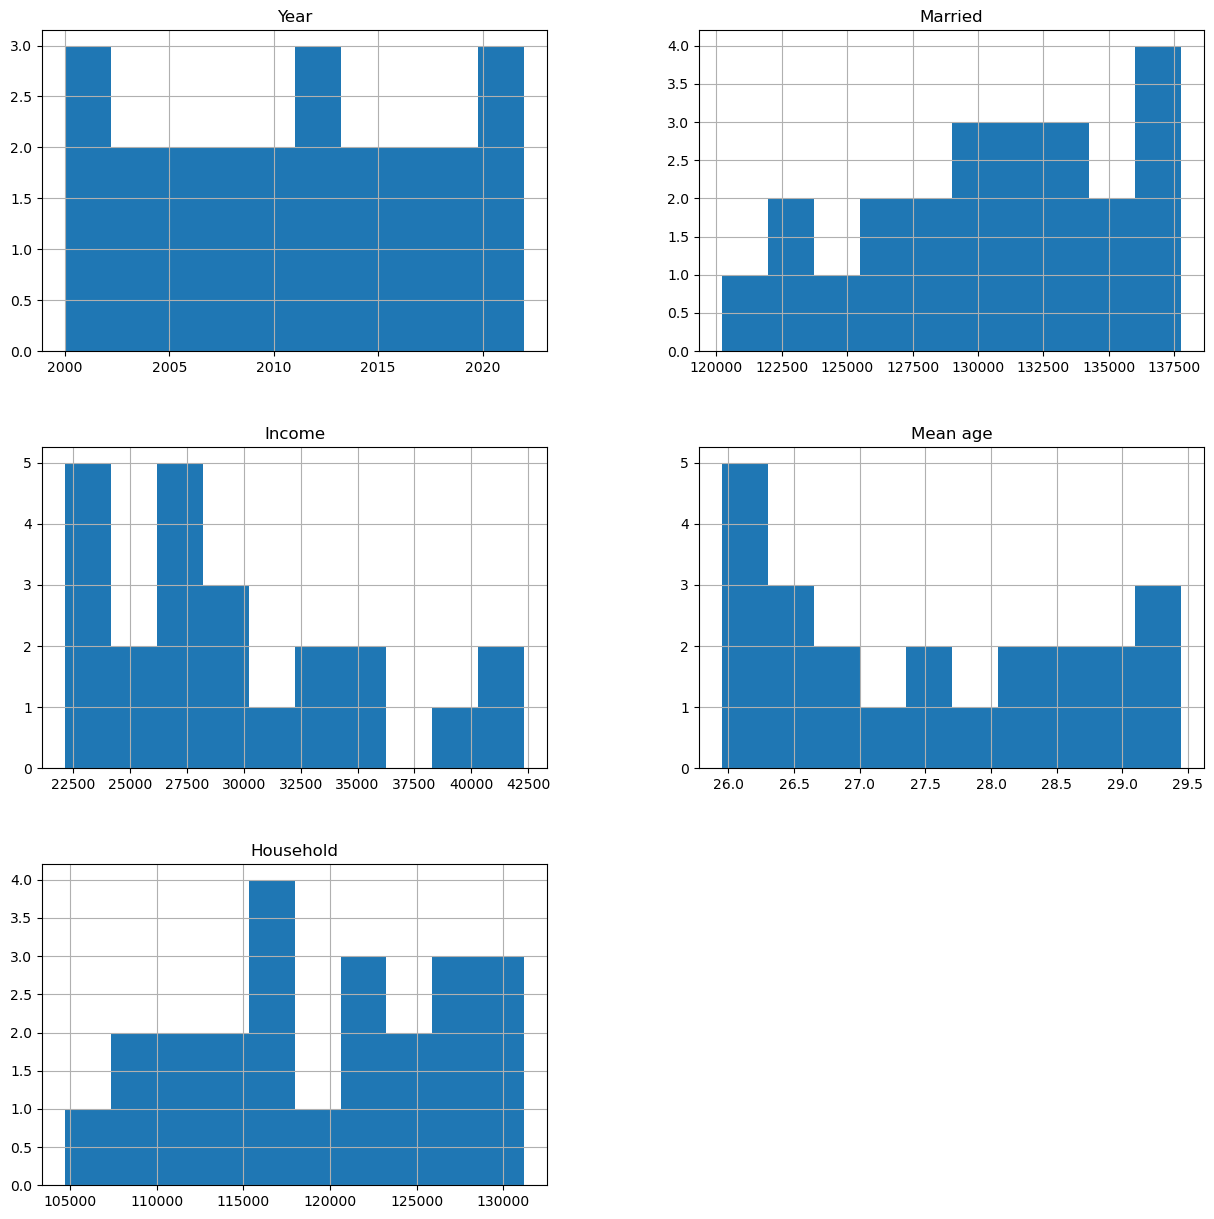

In [44]:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [45]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parameter testing

In [46]:

# sim

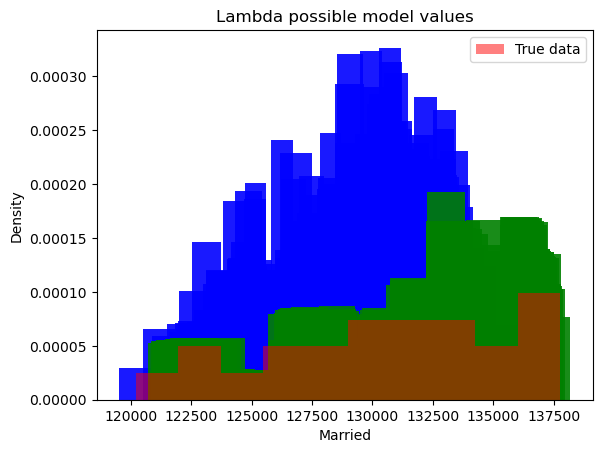

In [47]:
from numpy import random
alpha = 0.46
beta = 143000

sim = random.normal(-alpha*df['Income'] + beta, 1500, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='blue', alpha = 0.9, density=True)

sim = random.poisson(-alpha*1.7*df['Income'] + beta*1.08, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='green', alpha = 0.9, density=True)

plt.hist(df['Married'], color='red', alpha = 0.5, density=True, label='True data')
plt.title('Lambda possible model values')
plt.xlabel('Married')
plt.ylabel('Density')
plt.legend()
plt.show()

In [48]:
beta*1.08

154440.0

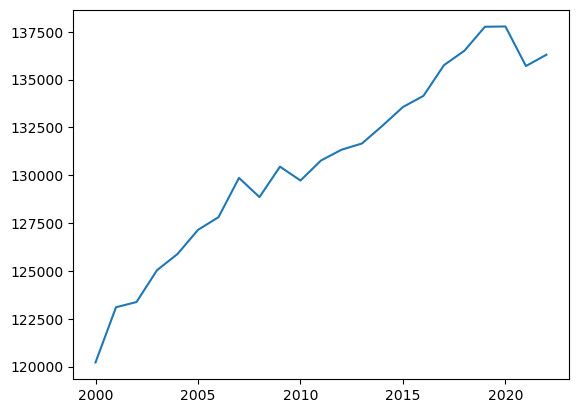

In [49]:
plt.plot(df['Year'], df['Married'])
plt.show()

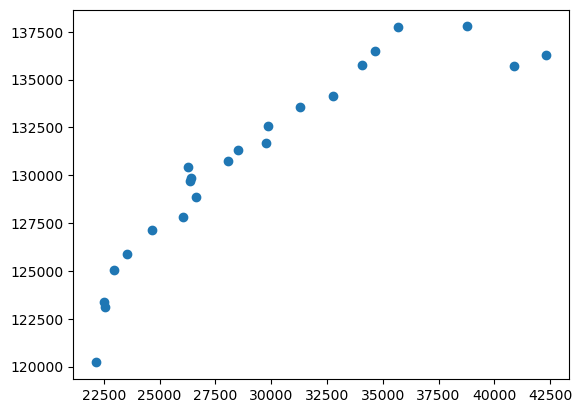

In [50]:
plt.scatter(df['Income'], df['Married'])
plt.show()

# Income na małżeństwa

In [51]:
model = CmdStanModel(stan_file='prior.stan')
#model = CmdStanModel(stan_file='model_adam_1_prior.stan')
N = 23
R = 30

21:50:30 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\prior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\prior.exe
21:50:49 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\prior.exe
21:50:49 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
21:50:49 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/prior.hpp C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/prior.stan
Warning in 'C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/prior.stan', line 26, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m6

In [52]:
data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

21:50:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


21:50:50 - cmdstanpy - INFO - CmdStan done processing.


In [53]:
gen_1.draws_pd()

,lp__,accept_stat__,alpha,beta,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.000271,0.000078,95140.0,64332.0,36088.0,15847.0,12051.0,10137.0,...,1234.0,1375.0,1305.0,1205.0,807.0,572.0,513.0,466.0,477.0,441.0
1,0.0,0.0,-0.000036,0.000074,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000140,0.000074,335.0,310.0,248.0,144.0,131.0,106.0,...,41.0,39.0,34.0,47.0,39.0,26.0,31.0,22.0,19.0,23.0
3,0.0,0.0,0.000012,0.000064,0.0,5.0,2.0,2.0,0.0,6.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0
4,0.0,0.0,-0.000171,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.000064,0.000043,12.0,13.0,6.0,3.0,7.0,6.0,...,1.0,11.0,6.0,2.0,6.0,4.0,3.0,10.0,8.0,8.0
6,0.0,0.0,-0.000012,-0.000037,2.0,1.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.000003,0.000098,0.0,2.0,1.0,2.0,3.0,2.0,...,0.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,0.0,-0.000027,-0.000064,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.000038,-0.000138,4.0,2.0,5.0,1.0,3.0,5.0,...,1.0,4.0,4.0,2.0,2.0,3.0,2.0,3.0,1.0,3.0


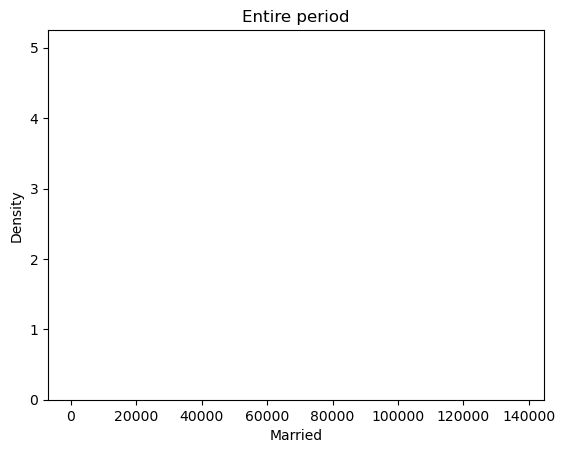

In [54]:
for i in range(R):
    plt.hist(gen_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)
plt.hist(df['Married'], bins=23, color='red', density=True)
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.show()

In [55]:
post_model = CmdStanModel(stan_file='posterior.stan')


ValueError: Failed to get source info for Stan model 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan'. Console:
Warning in 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Syntax error in 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan', line 24, column 11 to column 12, parsing error:
   -------------------------------------------------
    22:  
    23:  generated quantities {
    24:    int<lower> y_sim[N];
                    ^
    25:    for (n in 1:N) {
    26:      y_sim[n] = poisson_rng(-alpha * income[n] + beta);
   -------------------------------------------------

Expected "=" expression (not containing binary logical operators), after "lower".


In [ ]:
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

02:18:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status02:18:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed


02:18:09 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:

Command and output files:
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['C:\\Users\\Julia\\Desktop\\Data analysis\\Project\\DA_project\\posterior.exe', 'id=1', 'random', 'seed=99410', 'data', 'file=C:\\Users\\Julia\\AppData\\Local\\Temp\\tmp11ts5rda\\xozzub56.json', 'output', 'file=C:\\Users\\Julia\\AppData\\Local\\Temp\\tmp11ts5rda\\posteriorpty658tq\\posterior-20240608021809.csv', 'method=sample', 'num_samples=30', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\Julia\AppData\Local\Temp\tmp11ts5rda\posteriorpty658tq\posterior-20240608021809.csv
 console_msgs (if any):
	C:\Users\Julia\AppData\Local\Temp\tmp11ts5rda\posteriorpty658tq\posterior-20240608021809_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [ ]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,y_sim[1],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,32398500.0,1.000000,0.1603,2.0,3.0,0.0,-32398500.0,0.618953,112727.0,138739.0,...,128747.0,129521.0,129510.0,128716.0,128246.0,126975.0,127021.0,126389.0,126535.0,127414.0
1,32398500.0,0.843899,0.1603,2.0,3.0,0.0,-32398500.0,0.619277,112759.0,139612.0,...,128888.0,129828.0,128584.0,129098.0,128087.0,127302.0,127317.0,126805.0,126806.0,126703.0
2,32398500.0,1.000000,0.1603,3.0,11.0,0.0,-32398500.0,0.624596,112559.0,139579.0,...,128218.0,129287.0,129173.0,128587.0,128168.0,127135.0,127131.0,127022.0,126318.0,126121.0
3,32398500.0,0.990044,0.1603,3.0,15.0,0.0,-32398500.0,0.613355,112824.0,138628.0,...,129418.0,128451.0,129079.0,129134.0,127850.0,127595.0,127327.0,126772.0,126360.0,126950.0
4,32398500.0,0.869981,0.1603,3.0,11.0,0.0,-32398500.0,0.602512,113073.0,138845.0,...,128619.0,129064.0,129477.0,128329.0,127562.0,127214.0,126743.0,126287.0,126575.0,126609.0
5,32398500.0,0.877870,0.1603,2.0,7.0,0.0,-32398500.0,0.603355,113191.0,139054.0,...,129499.0,129263.0,129160.0,129321.0,128284.0,127832.0,126758.0,126233.0,126639.0,126373.0
6,32398500.0,0.998036,0.1603,3.0,7.0,0.0,-32398500.0,0.599206,113295.0,138537.0,...,129190.0,128944.0,129623.0,129339.0,128412.0,127421.0,127134.0,127029.0,126306.0,126021.0
7,32398500.0,0.895355,0.1603,2.0,3.0,0.0,-32398500.0,0.599014,113352.0,139150.0,...,129047.0,129308.0,128635.0,129259.0,127665.0,127284.0,126975.0,126391.0,127212.0,126952.0
8,32398500.0,0.967165,0.1603,3.0,7.0,0.0,-32398500.0,0.596013,113357.0,138603.0,...,128757.0,129184.0,128255.0,129031.0,127911.0,126952.0,127304.0,126364.0,127365.0,125749.0
9,32398500.0,0.850849,0.1603,2.0,3.0,0.0,-32398500.0,0.596023,113451.0,138832.0,...,129194.0,129409.0,128582.0,128570.0,127993.0,127389.0,127156.0,127059.0,127217.0,126391.0


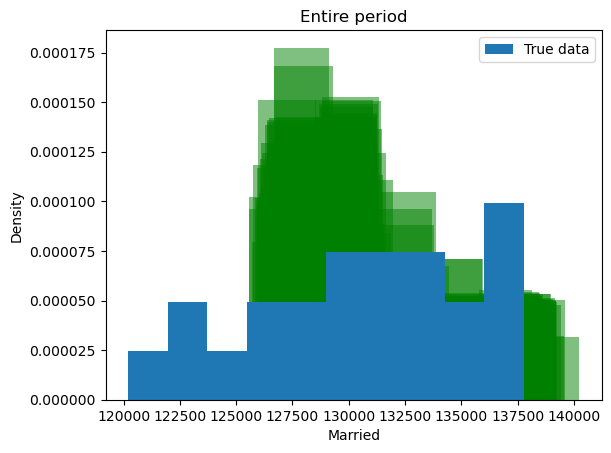

In [ ]:

for i in range(R):
    plt.hist(fit_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)

plt.hist(df['Married'], density=True, label= 'True data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

# Analiza

In [ ]:
az.summary(fit_1)

arviz - WARNING - Shape validation failed: input_shape: (1, 30), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.618,0.013,0.596,0.632,0.009,0.008,2.0,16.0,NaN
beta,112708.933,399.471,112233.000,113397.000,269.917,224.331,2.0,20.0,NaN
y_sim[0],138903.000,455.287,138150.000,139612.000,100.863,72.380,24.0,39.0,NaN
y_sim[1],137945.467,423.150,137301.000,138676.000,66.865,47.630,30.0,20.0,NaN
y_sim[2],136623.933,481.305,135888.000,137260.000,126.484,91.304,24.0,39.0,NaN
y_sim[3],134808.933,462.487,133927.000,135493.000,97.563,69.903,20.0,16.0,NaN
y_sim[4],134170.467,400.031,133467.000,134905.000,79.810,57.103,25.0,16.0,NaN
y_sim[5],133772.667,385.825,133090.000,134377.000,181.507,137.682,4.0,35.0,NaN
y_sim[6],132952.067,355.758,132396.000,133626.000,104.337,75.894,10.0,20.0,NaN
y_sim[7],132129.267,270.610,131675.000,132604.000,68.164,49.120,17.0,39.0,NaN


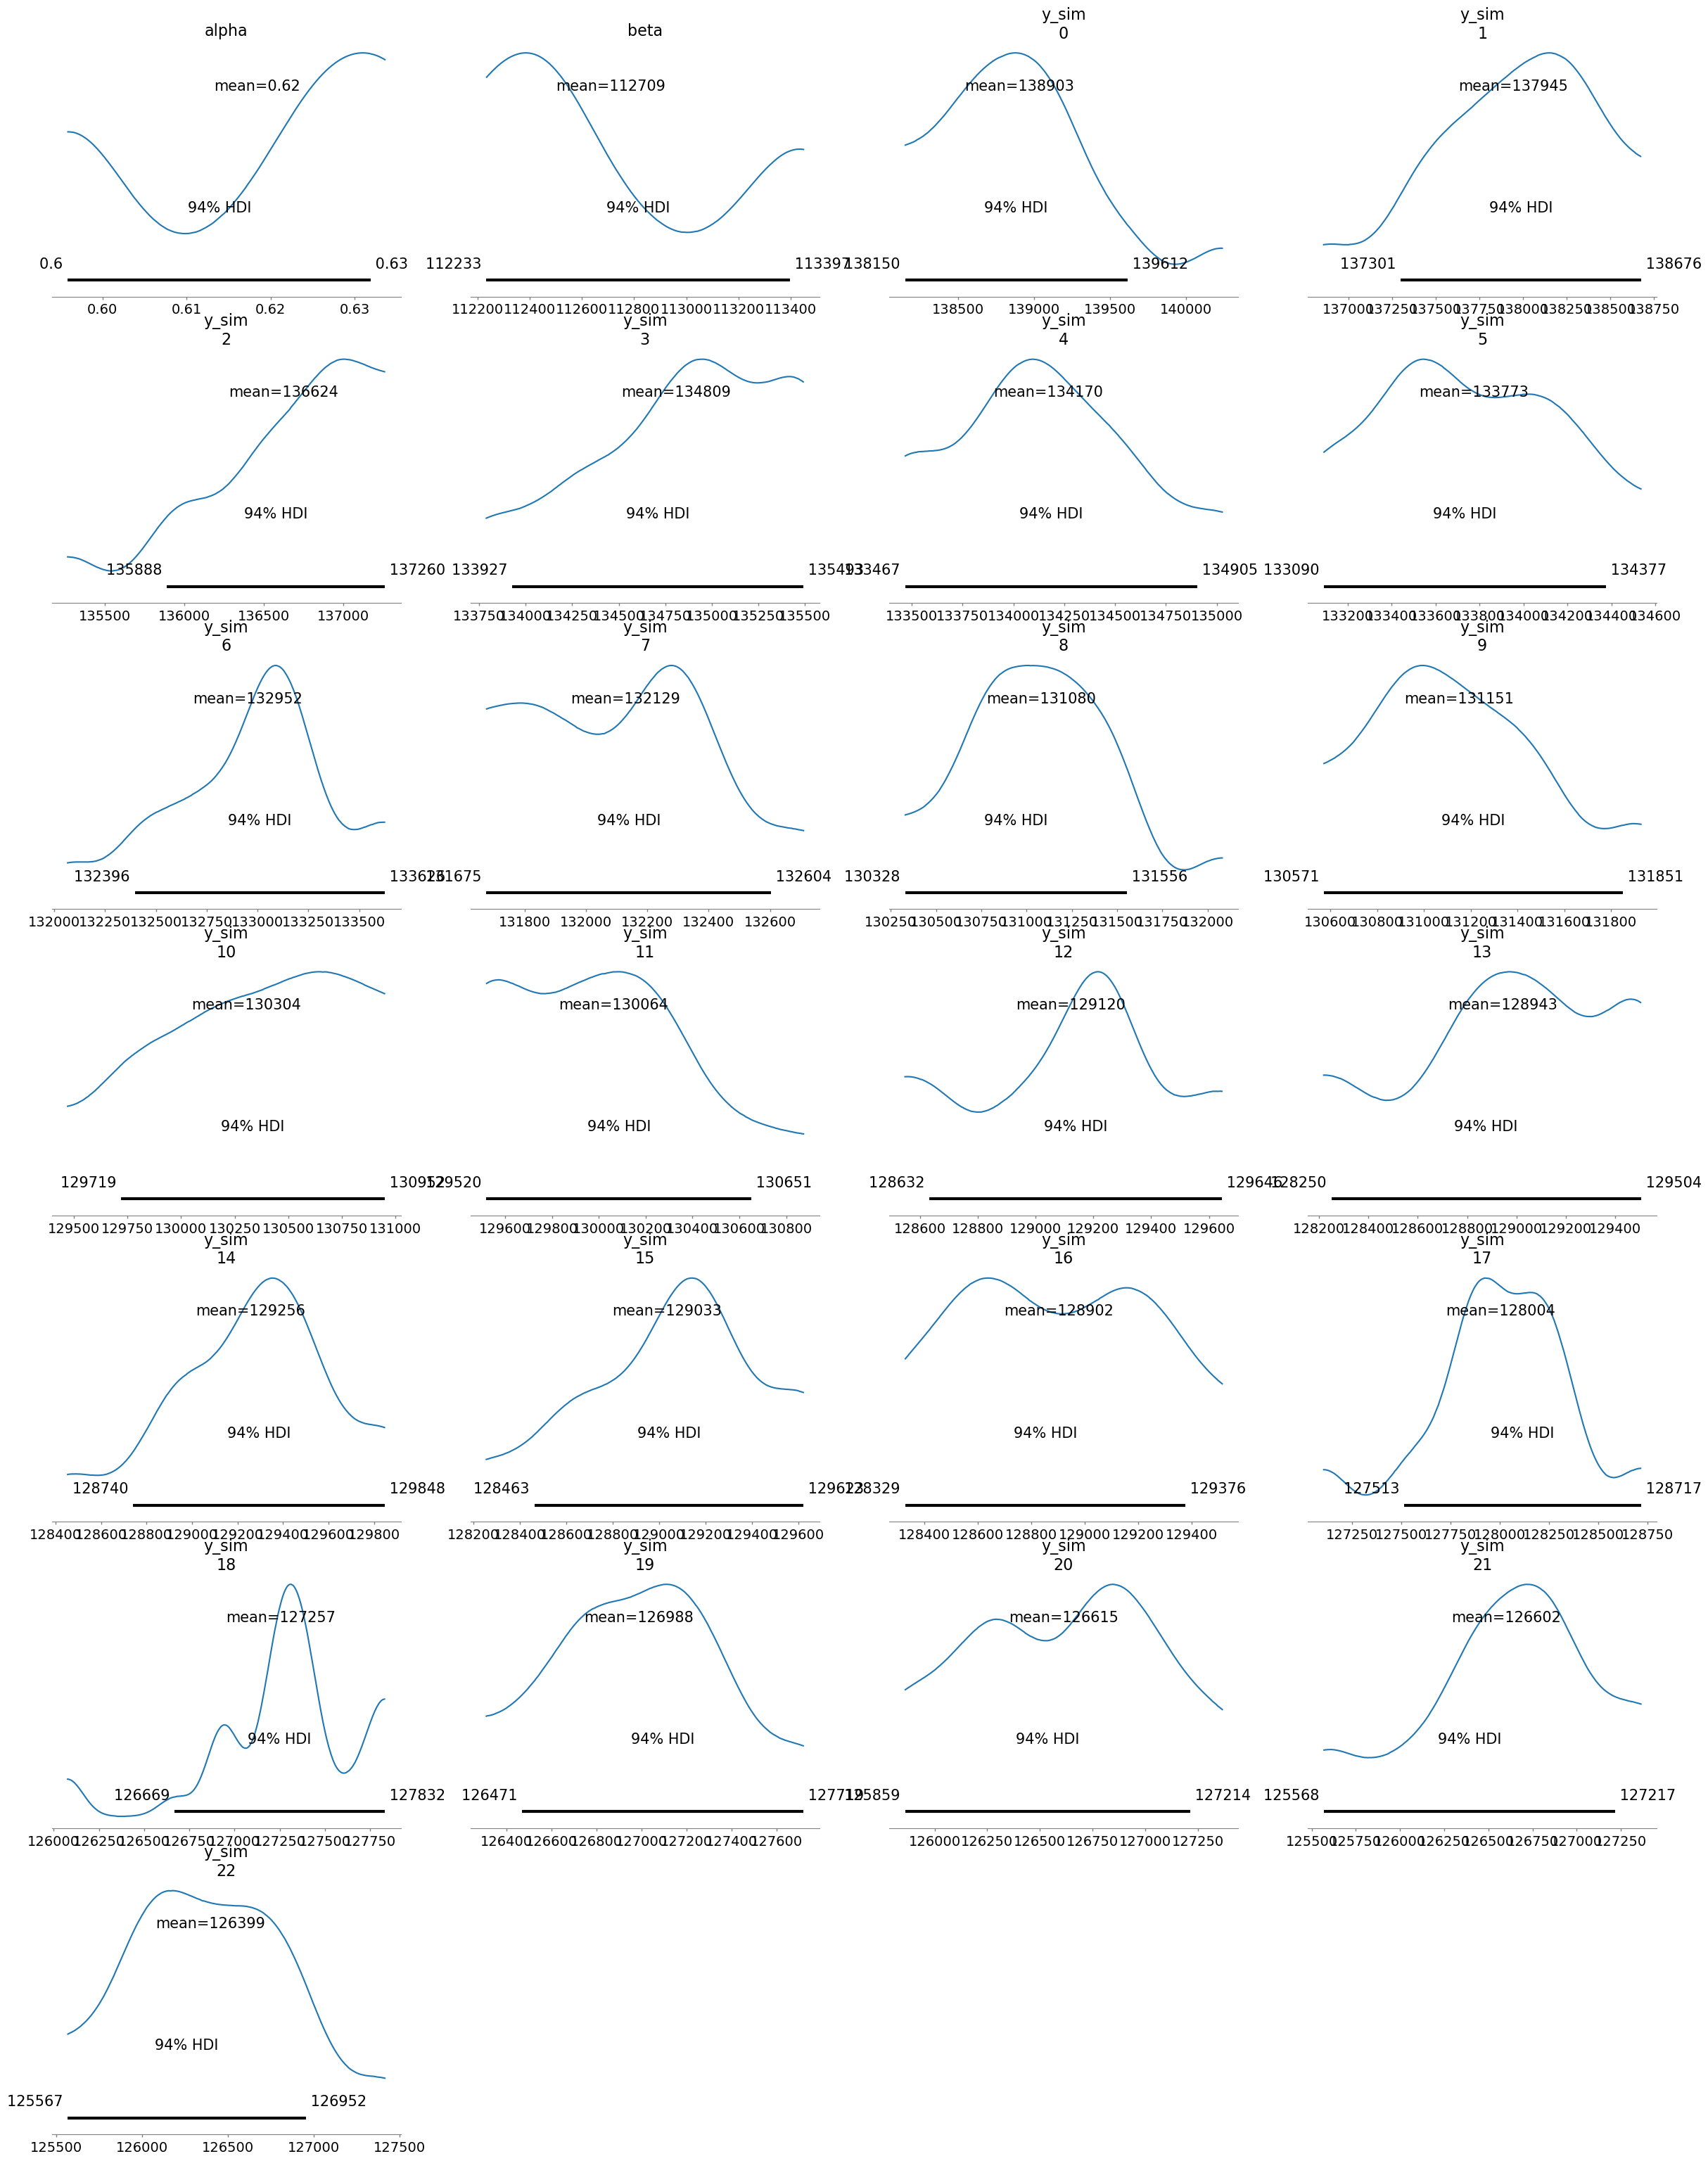

In [ ]:
az.plot_posterior(fit_1)
plt.show()

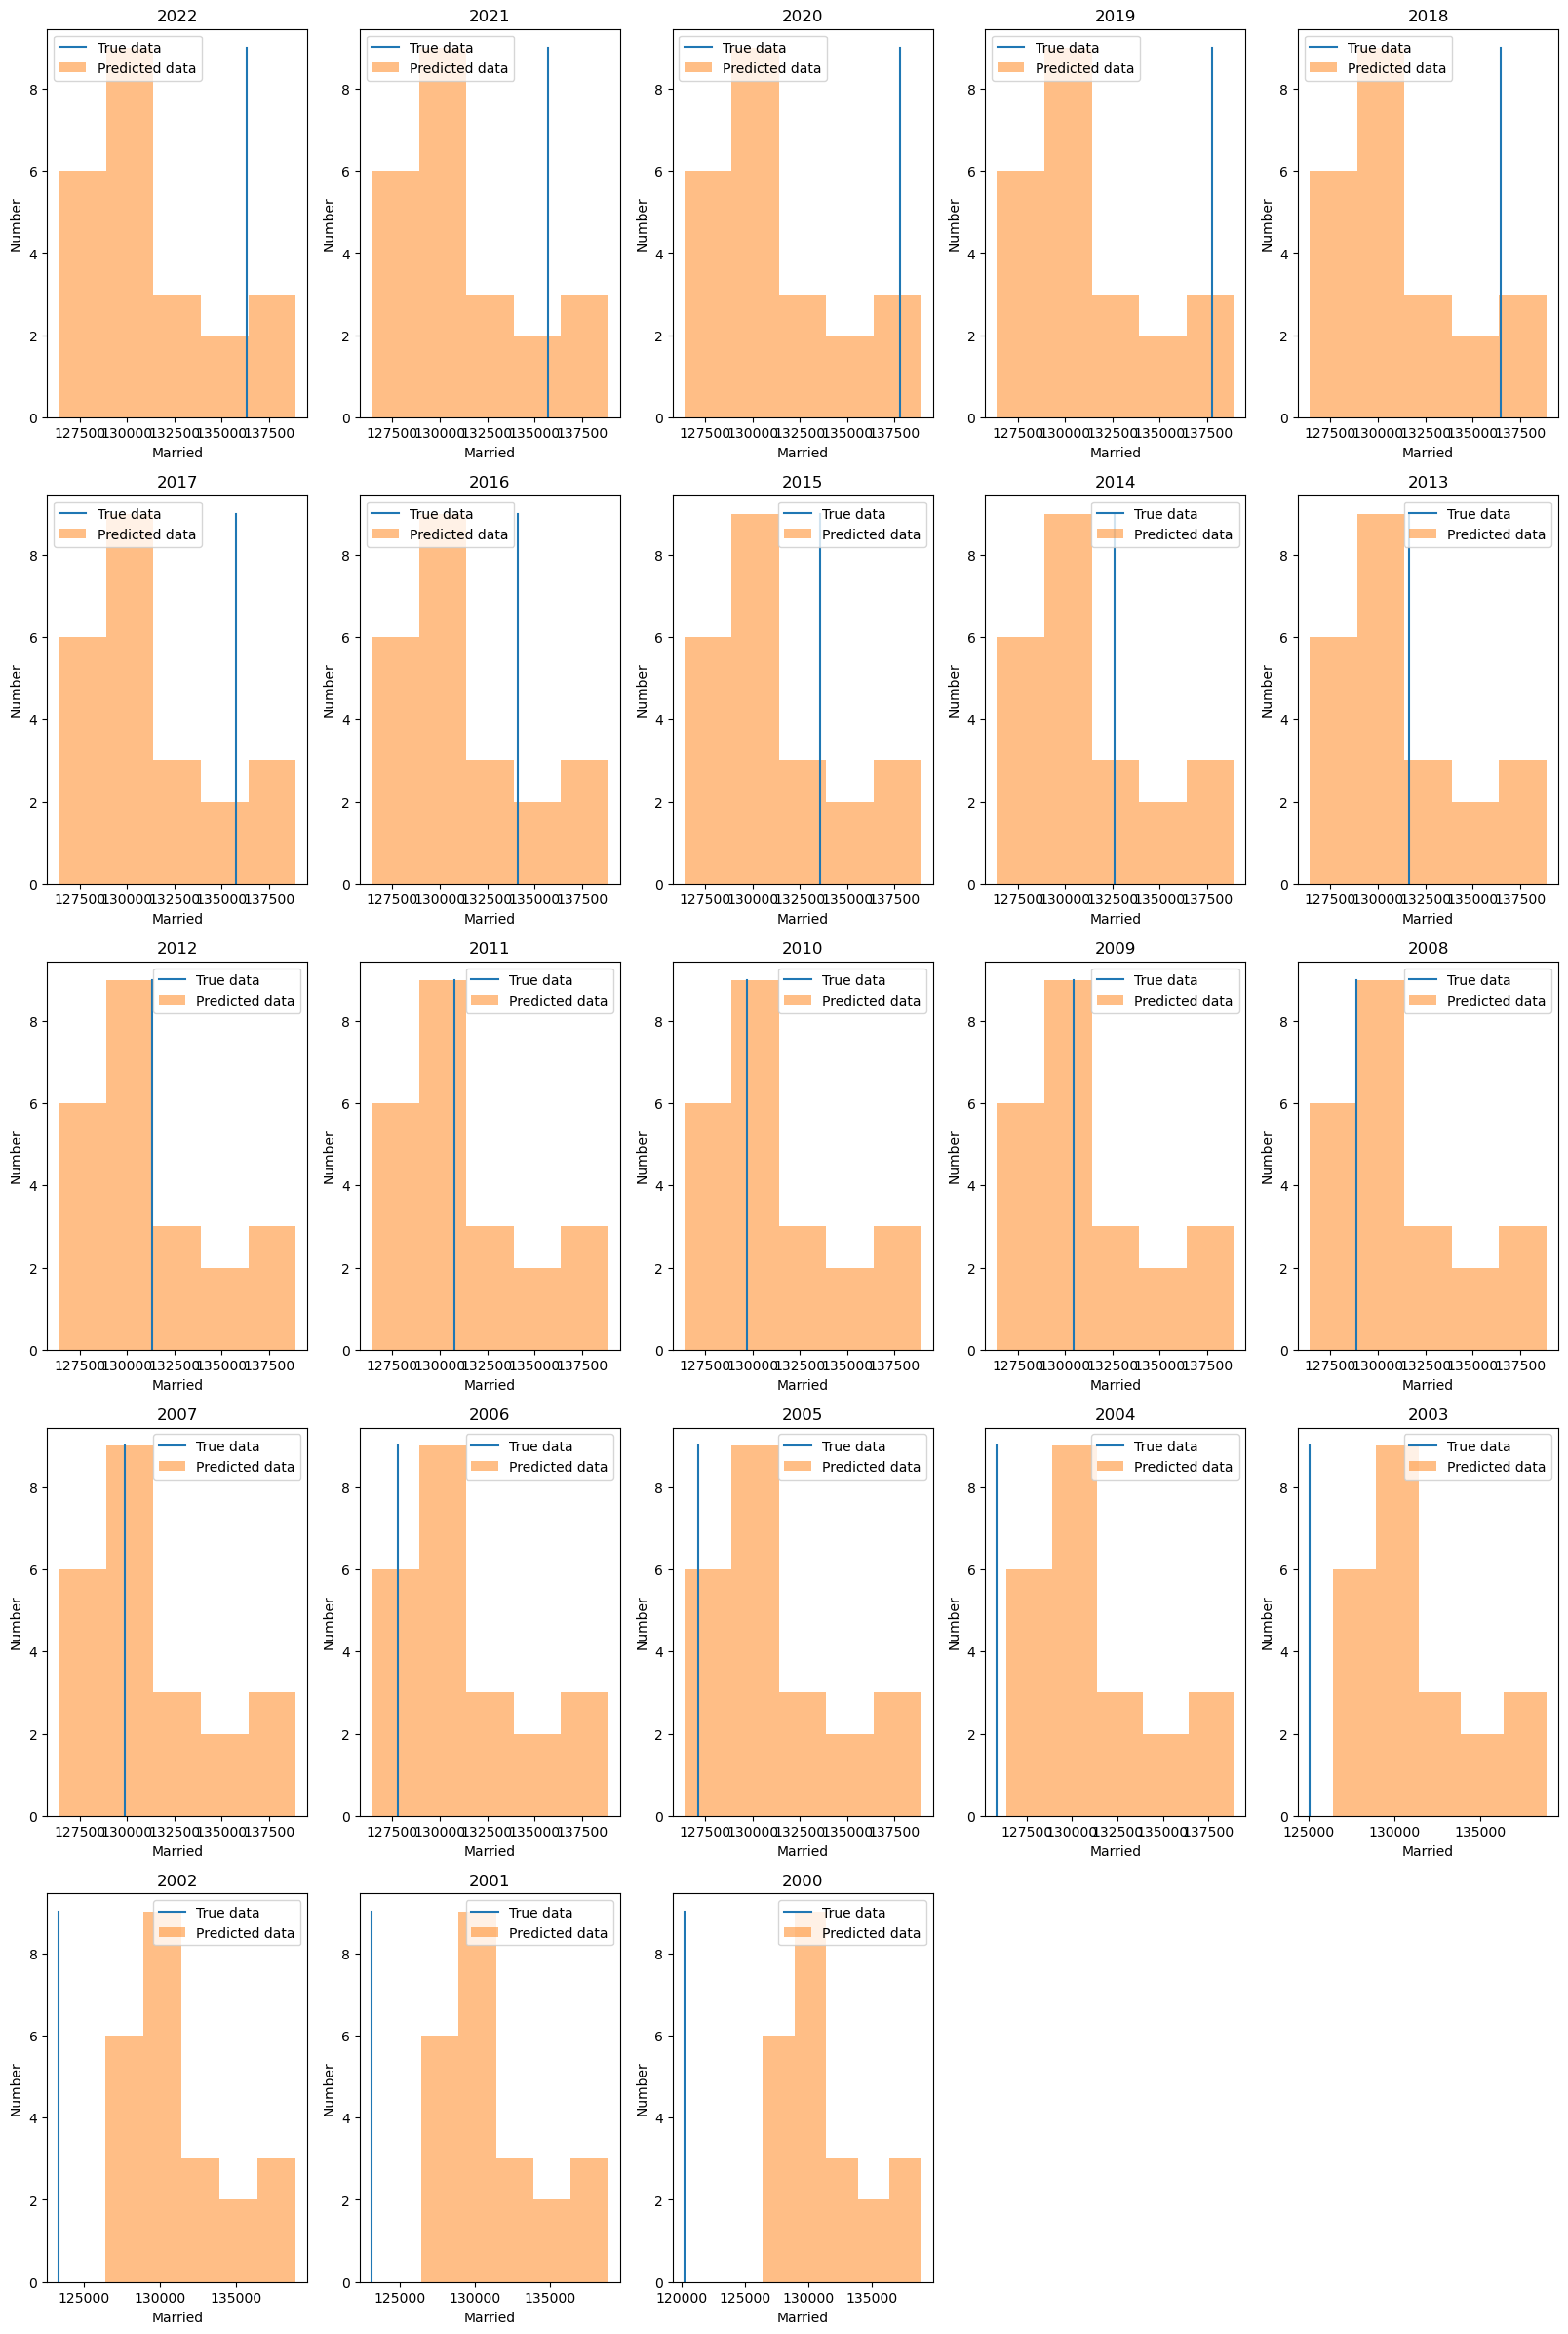

In [ ]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_1.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

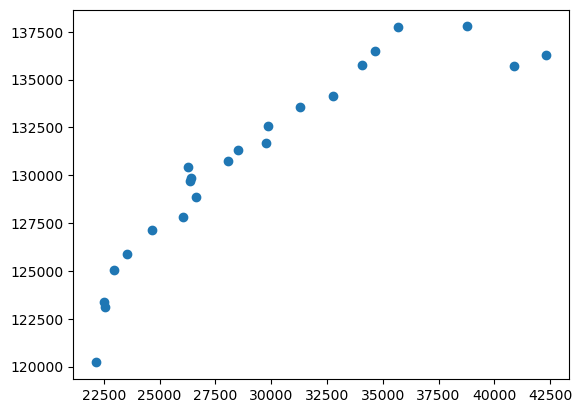

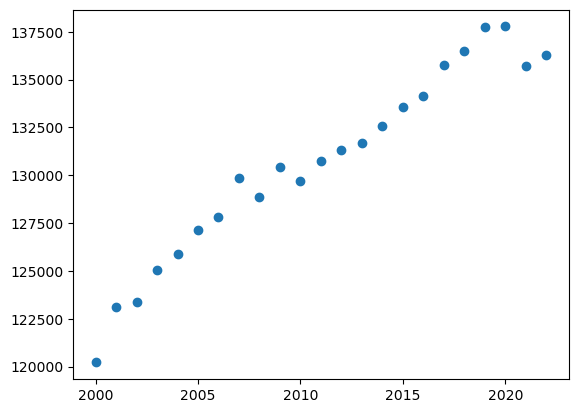

In [ ]:
plt.scatter(df['Income'], df['Married'])

# for i in range(24):
#     plt.plot(df['Income'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

plt.scatter(df['Year'], df['Married'])
# for i in range(24):
#     plt.plot(df['Year'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

# Income i Household na ilość małżeństw

In [114]:
model = CmdStanModel(stan_file='model_prior.stan')
data = {'N': N, 'income': df['Income']}
gen_2 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

22:16:29 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_prior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_prior.exe
22:16:50 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\model_prior.exe
22:16:50 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
22:16:50 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_prior.hpp C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_prior.stan
Warning in 'C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/model_prior.stan', line 9, column 26: fabs
    is deprecated and will be removed in Stan 2.33.0. Use abs instead. This
    can be automatically changed using the canonicalize flag for stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialize


22:16:51 - cmdstanpy - INFO - CmdStan done processing.


In [115]:
gen_2.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.968777,109497.0,1.200590,150504.0,149081.0,147045.0,144084.0,143056.0,...,134947.0,135277.0,135083.0,134726.0,133397.0,132311.0,131748.0,131326.0,131364.0,130937.0
1,0.0,0.0,0.797127,107566.0,0.665791,141309.0,140136.0,138462.0,136023.0,135180.0,...,128508.0,128778.0,128619.0,128324.0,127232.0,126338.0,125874.0,125525.0,125556.0,125207.0
2,0.0,0.0,0.696207,106847.0,1.575040,136315.0,135293.0,133833.0,131705.0,130964.0,...,125137.0,125374.0,125235.0,124976.0,124023.0,123245.0,122841.0,122531.0,122558.0,122253.0
3,0.0,0.0,0.841544,107340.0,1.227360,142964.0,141725.0,139957.0,137381.0,136489.0,...,129446.0,129736.0,129564.0,129252.0,128101.0,127160.0,126671.0,126301.0,126335.0,125964.0
4,0.0,0.0,0.722057,103777.0,1.420960,134344.0,133283.0,131764.0,129554.0,128788.0,...,122744.0,122990.0,122846.0,122580.0,121591.0,120785.0,120365.0,120043.0,120074.0,119756.0
5,0.0,0.0,0.719944,109138.0,0.425360,139614.0,138555.0,137044.0,134840.0,134078.0,...,128051.0,128296.0,128152.0,127886.0,126899.0,126093.0,125676.0,125359.0,125387.0,125071.0
6,0.0,0.0,0.862507,107726.0,0.744717,144235.0,142968.0,141157.0,138518.0,137604.0,...,130384.0,130677.0,130505.0,130185.0,129005.0,128040.0,127538.0,127158.0,127193.0,126816.0
7,0.0,0.0,0.646269,108839.0,1.057910,136197.0,135244.0,133888.0,131912.0,131226.0,...,125817.0,126038.0,125907.0,125669.0,124784.0,124061.0,123684.0,123398.0,123424.0,123142.0
8,0.0,0.0,0.780522,110074.0,0.865611,143113.0,141966.0,140327.0,137939.0,137111.0,...,130579.0,130844.0,130688.0,130400.0,129329.0,128456.0,128002.0,127659.0,127690.0,127347.0
9,0.0,0.0,0.672446,107669.0,2.180070,136134.0,135146.0,133733.0,131673.0,130957.0,...,125336.0,125562.0,125424.0,125180.0,124261.0,123507.0,123112.0,122821.0,122847.0,122552.0


In [120]:
np.mean(gen_2.alpha)

0.7966536666666667

In [119]:
np.mean(gen_2.beta)

107702.5

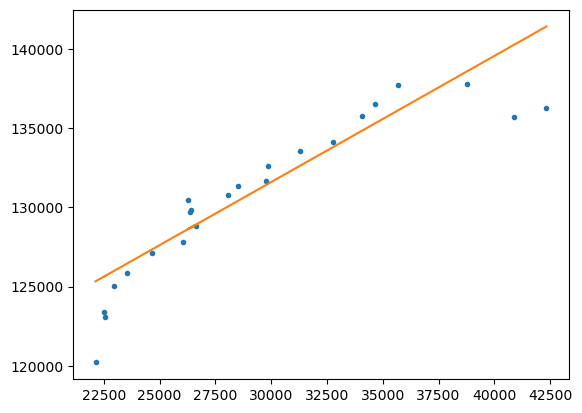

In [122]:
alpha = np.mean(gen_2.alpha)
beta = np.mean(gen_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


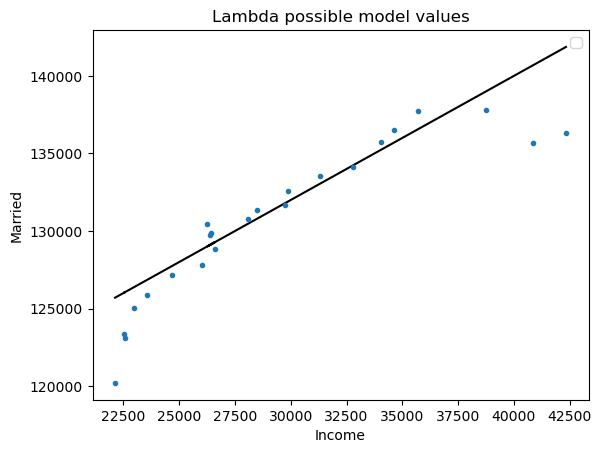

In [113]:
from numpy import random
alpha = 0.8
beta = 108000

sim = random.normal(alpha*df['Income'] + beta, 1500, 23)


plt.plot(df['Income'], alpha*df['Income'] + beta, color='black')

plt.plot(df['Income'], df['Married'],'.')
plt.title('Lambda possible model values')
plt.xlabel('Income')
plt.ylabel('Married')
plt.legend()
plt.show()

In [126]:
post_model = CmdStanModel(stan_file='model.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

22:22:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


22:22:10 - cmdstanpy - INFO - CmdStan done processing.


In [127]:
fit_2.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,-9844.86,0.989624,0.140864,5.0,31.0,0.0,9846.23,0.754082,108449.0,97.9625,...,128491.0,128484.0,128346.0,128023.0,126938.0,126081.0,125932.0,125265.0,125463.0,125058.0
1,-9844.78,0.608290,0.140864,2.0,3.0,0.0,9847.87,0.754359,108450.0,97.8176,...,128398.0,128359.0,128507.0,128141.0,127204.0,125958.0,125611.0,125433.0,125512.0,124975.0
2,-9844.91,1.000000,0.140864,4.0,15.0,0.0,9845.70,0.752129,108536.0,99.4578,...,128304.0,128456.0,128250.0,127998.0,127203.0,126357.0,125804.0,125498.0,125452.0,125199.0
3,-9844.93,0.904768,0.140864,3.0,7.0,0.0,9845.79,0.752553,108507.0,99.4521,...,128230.0,128525.0,128226.0,127881.0,127284.0,126424.0,125832.0,125550.0,125396.0,125281.0
4,-9846.62,0.999641,0.140864,5.0,31.0,0.0,9846.84,0.750854,108559.0,99.7525,...,128293.0,128423.0,128390.0,128168.0,127071.0,126184.0,125565.0,125348.0,125518.0,125149.0
5,-9845.44,0.991197,0.140864,4.0,31.0,0.0,9846.96,0.755262,108459.0,97.6405,...,128427.0,128664.0,128533.0,128102.0,127059.0,126240.0,125739.0,125543.0,125514.0,125311.0
6,-9846.41,0.993229,0.140864,4.0,15.0,0.0,9848.77,0.752905,108498.0,99.8553,...,128287.0,128429.0,128487.0,128105.0,127131.0,126262.0,125861.0,125459.0,125619.0,125188.0
7,-9844.68,0.832813,0.140864,5.0,31.0,0.0,9849.69,0.759454,108349.0,98.8320,...,128162.0,128559.0,128650.0,127972.0,127025.0,126184.0,125773.0,125555.0,125681.0,125227.0
8,-9843.78,0.965951,0.140864,3.0,15.0,0.0,9846.46,0.756039,108443.0,98.5096,...,128393.0,128585.0,128436.0,128046.0,127301.0,126399.0,125775.0,125464.0,125561.0,125226.0
9,-9843.01,0.912131,0.140864,2.0,3.0,0.0,9844.38,0.755304,108442.0,98.5245,...,128133.0,128668.0,128590.0,128018.0,126909.0,126265.0,125947.0,125503.0,125503.0,125208.0


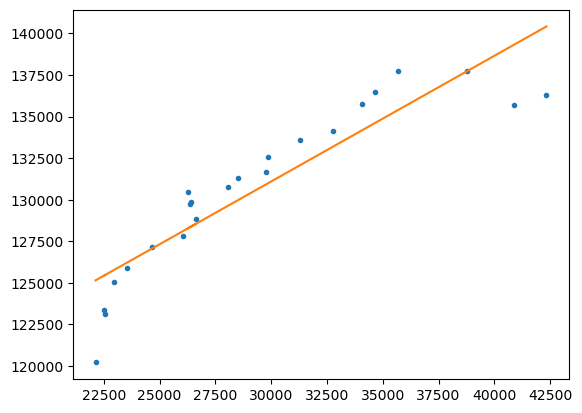

In [128]:
alpha = np.mean(fit_2.alpha)
beta = np.mean(fit_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

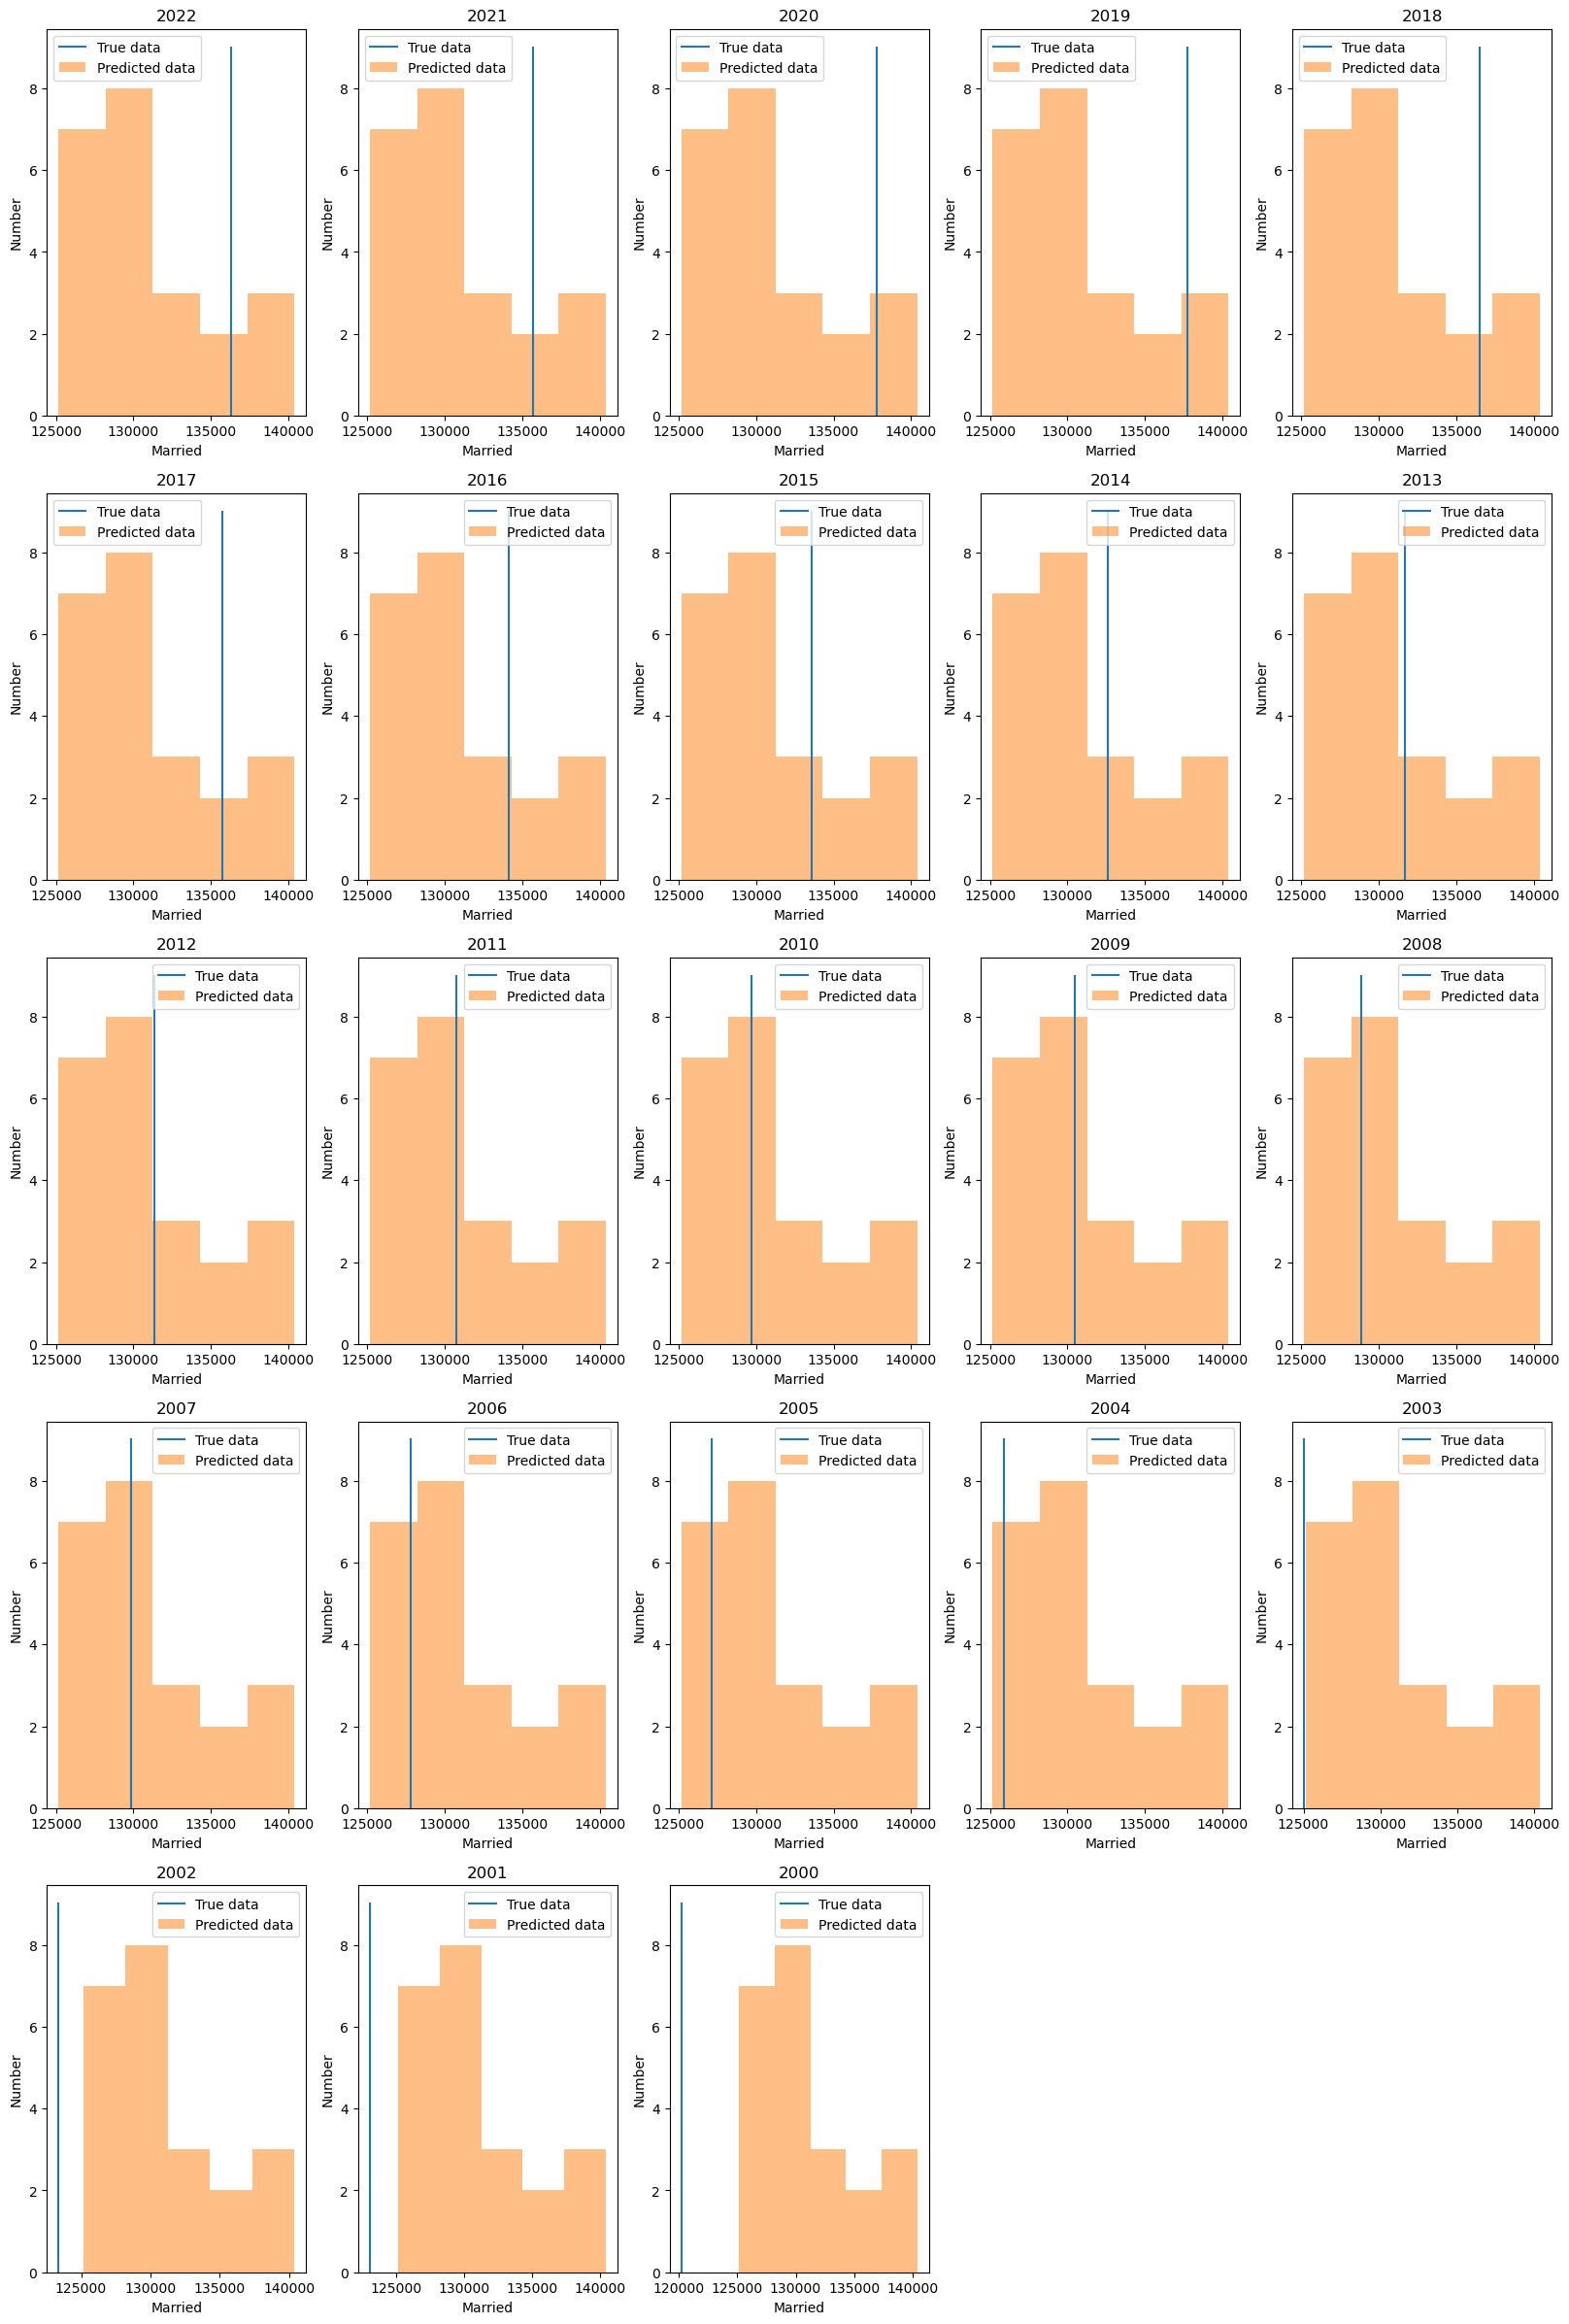

In [129]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_2.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()